# Observations and Insights

# Dependencies and starter code

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Mouse and study data files.
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results.
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset.
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Grouping by Drug Regimen, caclulate mean for each regimen.
summary_stats_mean = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

# Grouping by Drug Regimen, calculate median for each regimen.
summary_stats_median = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

# Grouping by Drug Regimen, calculate variance for each regimen.
summary_stats_variance = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Grouping by Drug Regimen, calculate standard deviation for each regimen.
summary_stats_std = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Combine summary stats into one summary dataframe and rename columns.
summary_stats_df = summary_stats_mean.to_frame().join(summary_stats_median, lsuffix=" Mean", rsuffix=" Median")
summary_stats_df = summary_stats_df.join(summary_stats_variance)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Variance"})
summary_stats_df = summary_stats_df.join(summary_stats_std)
summary_stats_df = summary_stats_df.rename(columns={ "Tumor Volume (mm3)": "Tumor Volume (mm3) Standard Deviation"})

summary_stats_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


# Bar plots

[]

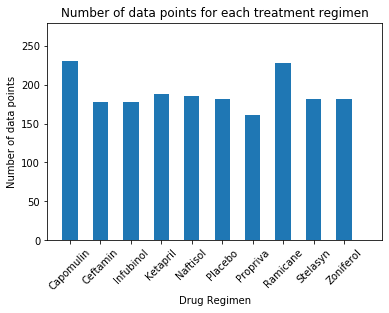

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_of_data_points_per_regimen = merged_df.groupby(['Drug Regimen'])['Mouse ID'].count()

number_points_df = pd.DataFrame(number_of_data_points_per_regimen)

# Create bar chart using pandas.
pandas_plot = number_of_data_points_per_regimen.plot(kind="bar")

# Add labels for axes and add a title for the graph.
pandas_plot.set_title("Number of data points for each treatment regimen")
pandas_plot.set_ylabel("Number of data points")

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45)

# Configure limits for x-axis and y-axis.
pandas_plot.set_xlim(-0.75, len(number_points_df)+0.25)
pandas_plot.set_ylim(0, max(number_points_df["Mouse ID"])+50)

# Show plot
pandas_plot.plot()

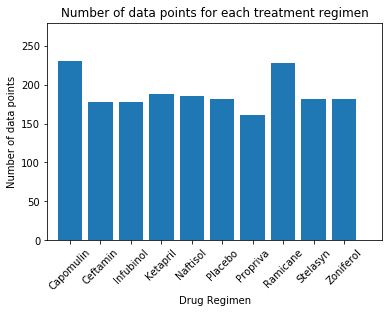

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(number_points_df))
tick_locations = [value for value in x_axis]

# Create bar chart using pyplot.
plt.bar(x_axis, number_points_df["Mouse ID"], align="center")

# Configure x-axis labels
plt.xticks(tick_locations, number_points_df.index.values, rotation=45)

# Add labels for axes and add a title for the graph.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of data points")
plt.title("Number of data points for each treatment regimen")

# Configure limits for x-axis and y-axis
plt.xlim(-0.75, len(number_points_df)+0.25)
plt.ylim(0, max(number_points_df["Mouse ID"])+50)

# Show plot
plt.show()

# Fit plot within figure cleanly
plt.tight_layout()

# Pie plots

[]

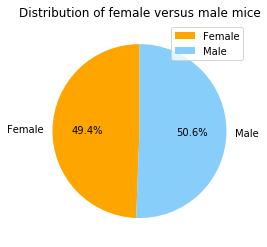

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group dataframe by gender and count up male and female mice.
gender_group_df = merged_df.groupby(['Sex'])['Mouse ID'].count()

# Convert to dataframe
gender_group_df = pd.DataFrame(gender_group_df)

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Create pie chart using pandas.
pandas_plot = gender_group_df.plot(kind="pie", y="Mouse ID", startangle=90, autopct="%1.1f%%", colors=colors)

# Add labels for axes and add a title for the graph.
pandas_plot.set_title("Distribution of female versus male mice")

# Hide y label
pandas_plot.set_ylabel('')

# Show plot
pandas_plot.plot()

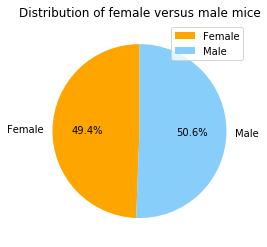

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = list(gender_group_df.index.values)

# The values of each section of the pie chart
sizes = list(gender_group_df.loc[:, "Mouse ID"])

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=90)

# Add title and legend.
plt.title("Distribution of female versus male mice")
plt.legend(loc="best")

# Show plot
plt.show()

# Quartiles, outliers, and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively
# determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Line and scatter plots

Text(0.5, 1.0, 'Tumor Volume (mm3) Over Time for Mouse s185')

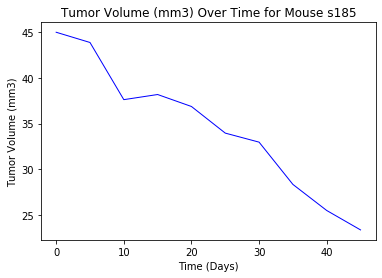

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Set index to Drug Regimen to be able to filter by regimen.
capomulin_mice = merged_df.set_index("Drug Regimen")

# Filter list to only include drug regimen of Capomulin
capomulin_mice = capomulin_mice.loc["Capomulin", ["Mouse ID", "Tumor Volume (mm3)"]]

# From the list of mice treated with Capomulin, store the id for the mouse we want to plot in a variable.
mouse_id = "s185"

# Get data for the the specific mouse
mouse_s185 = merged_df.loc[merged_df["Mouse ID"] == mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Create line plot
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"], linewidth=1, color="blue")

# Add labels to axes and add title for graph.
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) Over Time for Mouse s185")

Text(0.5, 1.0, 'Average Weight (g) vs Average Tumor Volume for the Capomulin Regimen')

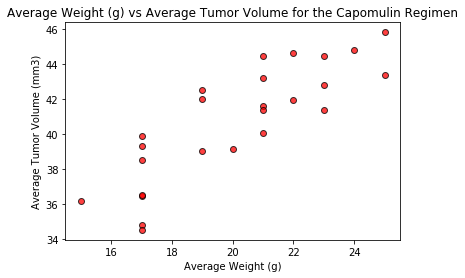

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Set index to Drug Regimen to be able to filter by regimen.
capomulin_mice = merged_df.set_index("Drug Regimen")

# Filter list to only include drug regimen of Capomulin
capomulin_mice = capomulin_mice.loc["Capomulin"]

# Group by mouse id and find average weight and average tumor volume for each mouse.
capomulin_mice = capomulin_mice.groupby(["Mouse ID"])["Weight (g)", "Tumor Volume (mm3)"].mean()

# Rename columns
capomulin_mice = capomulin_mice.rename(columns={
    "Weight (g)": "Average Weight (g)",
    "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"
})

# Create scatter plot
x_axis = capomulin_mice["Average Weight (g)"]
y_axis = capomulin_mice["Average Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

# Add axis labels and title for the graph
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Weight (g) vs Average Tumor Volume for the Capomulin Regimen")

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
# for the Capomulin regimen